In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

import keggler as kg
from helpers import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

import gc
gc.enable()

import warnings
warnings.simplefilter(action='ignore', category=Warning)

import os, psutil
import glob

# Set up a logger to dump messages to both log file and notebook
import logging as logging
def ini_log(filename):
    logger = logging.getLogger(__name__)
    ## avoid multiple printouts due to same handlers added several times
    if not logger.handlers:
        logger.setLevel(logging.DEBUG)

        handlers = [#logging.StreamHandler(None), 
            logging.FileHandler(filename, 'a')
        ]

        fmt=logging.Formatter('%(asctime)-15s: %(levelname)s  %(message)s')
        for h in handlers:
            h.setFormatter(fmt)
            logger.addHandler(h)
    return logger
        
log = ini_log('out.log')

#PATH='data_mini/'
#prefix='_mini'

PATH='data/'
prefix=''

n_files=1

print(os.listdir(PATH))


['submissions', 'test_set', 'track_features', 'training_set']


In [2]:
data_path = 'data/' # point this to your data folder
trn_path = data_path + '/training_set/'

# trn_input_logs = sorted(glob.glob(trn_path + "outDD_v1*.csv.gz"))
trn_input_logs = sorted(glob.glob(trn_path + "outDD_v2_0*.h5"))
trn_extra = sorted(glob.glob(trn_path + "outDD_v4_*.h5"))
ys   = sorted(glob.glob(trn_path + "y_0*.h5"))

In [3]:
trn_input_logs[:]

['data//training_set/outDD_v2_00.h5',
 'data//training_set/outDD_v2_01.h5',
 'data//training_set/outDD_v2_02.h5',
 'data//training_set/outDD_v2_03.h5',
 'data//training_set/outDD_v2_04.h5',
 'data//training_set/outDD_v2_05.h5',
 'data//training_set/outDD_v2_06.h5',
 'data//training_set/outDD_v2_07.h5',
 'data//training_set/outDD_v2_08.h5',
 'data//training_set/outDD_v2_09.h5']

In [4]:
trn_extra

['data//training_set/outDD_v3_0.h5',
 'data//training_set/outDD_v3_1.h5',
 'data//training_set/outDD_v3_2.h5',
 'data//training_set/outDD_v3_3.h5',
 'data//training_set/outDD_v3_4.h5']

# Read in the data

In [5]:
start_file=2
df_trn = pd.concat([read_log(f) for f in trn_input_logs[start_file:start_file+n_files]], axis=0, ignore_index=True)
print(df_trn.shape)
df_trn.rename({'not_skipped': 'skip_4'}, axis=1, inplace=True)
gc.collect()
df_xtr = pd.concat([read_log(f) for f in trn_extra[start_file:start_file+n_files]], axis=0, ignore_index=True)
print(df_xtr.shape)
df_trn = pd.concat([df_trn, df_xtr], axis=1)

from sklearn.preprocessing import LabelEncoder
df_trn['session_id'] = LabelEncoder().fit_transform(df_trn['session_id'])
df_trn['session_id'] = df_trn['session_id'].astype(np.uint32)

(6781153, 38)
(6781153, 9)


In [6]:
psutil.Process(os.getpid()).memory_info().rss / 1024**2

1913.33984375

In [7]:
df_trn.memory_usage(deep=True).sum()/1024**2

601.4321413040161

In [8]:
df_trn.dtypes

session_id                          uint32
session_position                      int8
session_length                        int8
skip_1                                int8
skip_2                                int8
skip_3                                int8
skip_4                                int8
context_switch                       uint8
no_pause_before_play                  int8
short_pause_before_play               int8
long_pause_before_play                int8
hist_user_behavior_is_shuffle        uint8
hour_of_day                           int8
premium                               int8
context_type                         uint8
hist_user_behavior_reason_start       int8
hist_user_behavior_reason_end         int8
duration                           float16
release_year                         int16
us_popularity_estimate             float16
acousticness                       float16
beat_strength                      float16
bounciness                         float16
danceabilit

In [9]:
df_trn.memory_usage(deep=True)/1024**2

Index                               0.000076
session_id                         25.868046
session_position                    6.467011
session_length                      6.467011
skip_1                              6.467011
skip_2                              6.467011
skip_3                              6.467011
skip_4                              6.467011
context_switch                      6.467011
no_pause_before_play                6.467011
short_pause_before_play             6.467011
long_pause_before_play              6.467011
hist_user_behavior_is_shuffle       6.467011
hour_of_day                         6.467011
premium                             6.467011
context_type                        6.467011
hist_user_behavior_reason_start     6.467011
hist_user_behavior_reason_end       6.467011
duration                           12.934023
release_year                       12.934023
us_popularity_estimate             12.934023
acousticness                       12.934023
beat_stren

In [10]:
df_trn.shape

(6781153, 46)

In [11]:
df_trn.head(21)

,session_id,session_position,session_length,skip_1,skip_2,skip_3,skip_4,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0,1,20,1,1,1,0,0,0,0,0,1,11,0,5,3,3,196.000,2018,100.0000,0.314697,0.437988,0.416504,0.616211,6.652344,0.832520,0.994629,0.000000e+00,3,0.174805,-3.314453,0.619141,1,0.349365,0.066956,97.8750,4,0.595215,-0.538989,0.436098,0.427989,0.121158,-0.254153,0.138731,0.395229,0.016646
1,0,2,20,1,1,1,0,0,1,0,0,1,11,0,5,3,3,201.500,2018,99.7500,0.118530,0.412109,0.395020,0.636719,6.511719,0.836914,1.008789,0.000000e+00,0,0.167236,-2.742188,0.656250,0,0.257080,0.043304,107.9375,4,0.616699,-0.204718,0.460288,0.393730,-0.157205,-0.311094,0.202527,0.239795,-0.136178
2,0,3,20,1,1,1,0,0,1,0,0,1,11,0,5,3,3,198.750,2018,99.8750,0.208252,0.435059,0.499023,0.567871,8.140625,0.757812,1.006836,0.000000e+00,9,0.186401,-3.966797,0.523438,1,0.367920,0.153442,167.8750,4,0.634766,-0.503787,0.500218,0.427214,-0.138270,-0.450133,0.140175,-0.047577,-0.027129
3,0,4,20,1,1,1,0,0,1,0,0,1,11,0,5,3,3,202.125,2018,99.8750,0.025024,0.558105,0.574219,0.711426,8.476562,0.879395,0.995605,6.556511e-07,9,0.087952,-3.429688,0.805176,1,0.138916,0.097778,145.0000,4,0.333008,-0.476728,0.427390,0.295531,-0.156709,-0.415339,0.139433,-0.083740,0.180001
4,0,5,20,1,1,1,0,0,1,0,0,1,11,0,5,3,3,192.625,2018,99.8750,0.297119,0.567871,0.633301,0.502441,9.625000,0.700195,1.022461,0.000000e+00,1,0.154175,-3.660156,0.303711,0,0.535156,0.126221,87.1875,4,0.640137,-0.483401,0.469586,0.434954,-0.113880,-0.382920,0.152804,-0.091255,-0.074182
5,0,6,20,1,1,1,0,0,1,0,0,1,11,0,5,3,3,222.250,2018,99.8125,0.805664,0.583984,0.558594,0.676758,7.906250,0.600098,1.015625,0.000000e+00,2,0.219238,-4.449219,0.607422,1,0.633789,0.054291,91.0625,4,0.613770,-0.224444,0.347467,0.395232,-0.111174,-0.330889,0.162200,0.080256,-0.150255
6,0,7,20,1,1,1,0,0,1,0,0,1,11,0,5,3,3,196.000,2018,100.0000,0.314697,0.437988,0.416504,0.616211,6.652344,0.832520,0.994629,0.000000e+00,3,0.174805,-3.314453,0.619141,1,0.349365,0.066956,97.8750,4,0.595215,-0.538989,0.436098,0.427989,0.121158,-0.254153,0.138731,0.395229,0.016646
7,0,8,20,1,1,1,0,0,1,0,0,1,11,0,5,3,3,201.500,2018,99.7500,0.118530,0.412109,0.395020,0.636719,6.511719,0.836914,1.008789,0.000000e+00,0,0.167236,-2.742188,0.656250,0,0.257080,0.043304,107.9375,4,0.616699,-0.204718,0.460288,0.393730,-0.157205,-0.311094,0.202527,0.239795,-0.136178
8,0,9,20,0,0,0,1,0,0,1,1,1,11,0,5,3,1,198.750,2018,99.8750,0.208252,0.435059,0.499023,0.567871,8.140625,0.757812,1.006836,0.000000e+00,9,0.186401,-3.966797,0.523438,1,0.367920,0.153442,167.8750,4,0.634766,-0.503787,0.500218,0.427214,-0.138270,-0.450133,0.140175,-0.047577,-0.027129
9,0,10,20,0,0,0,1,0,1,0,0,1,11,0,5,1,1,201.500,2018,99.7500,0.118530,0.412109,0.395020,0.636719,6.511719,0.836914,1.008789,0.000000e+00,0,0.167236,-2.742188,0.656250,0,0.257080,0.043304,107.9375,4,0.616699,-0.204718,0.460288,0.393730,-0.157205,-0.311094,0.202527,0.239795,-0.136178


# EDA

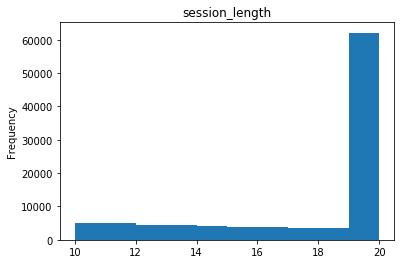

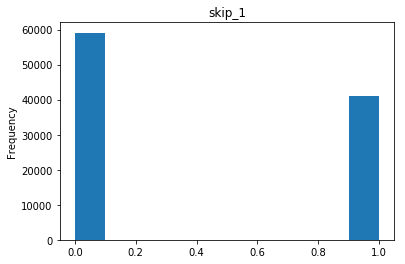

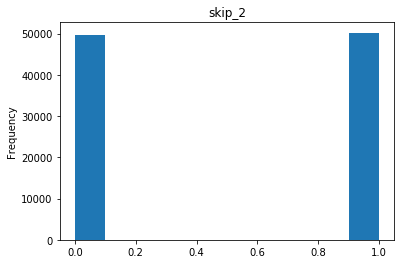

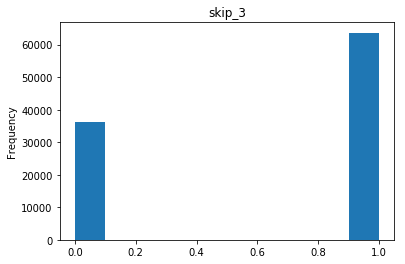

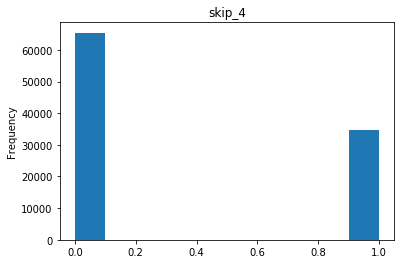

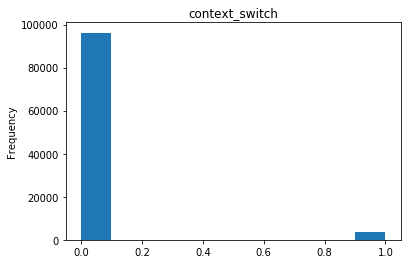

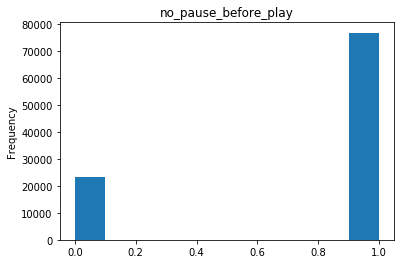

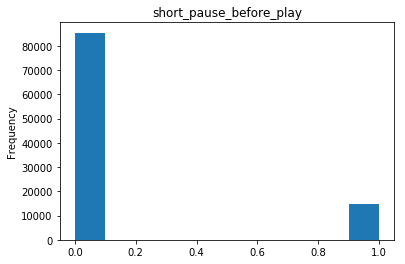

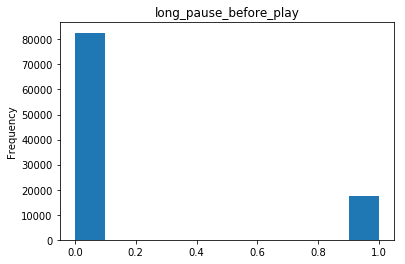

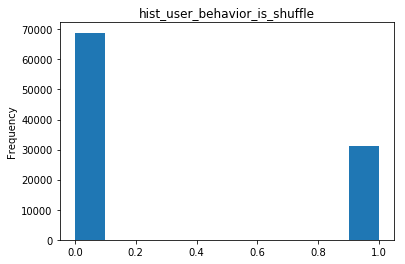

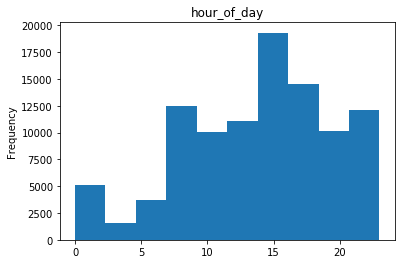

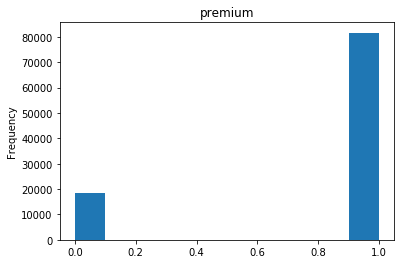

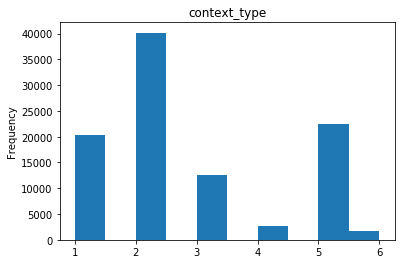

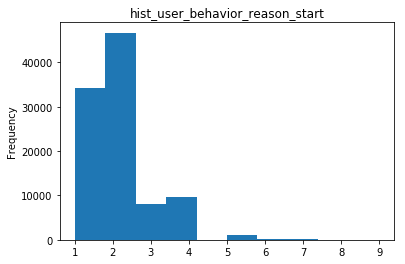

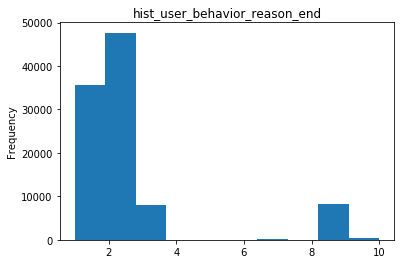

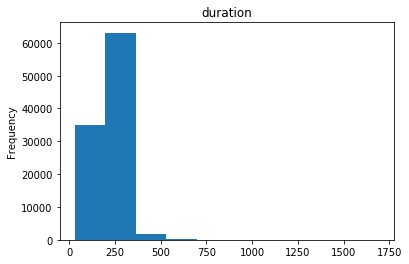

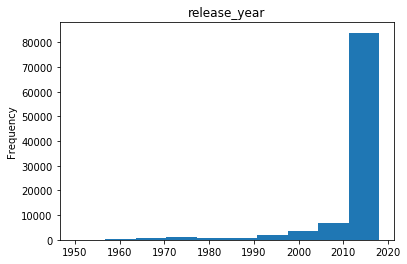

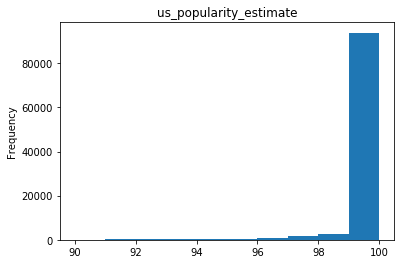

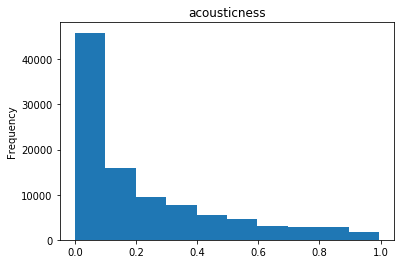

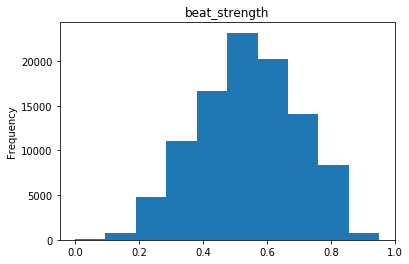

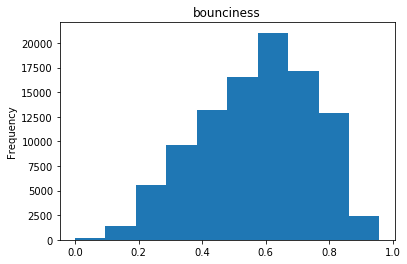

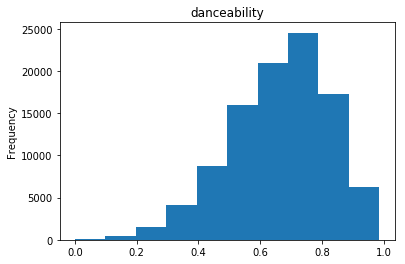

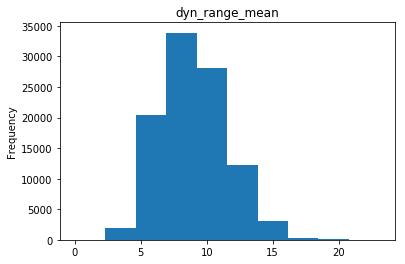

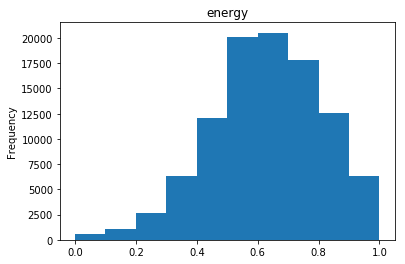

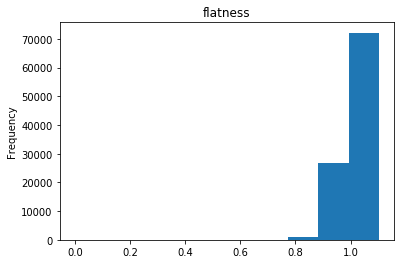

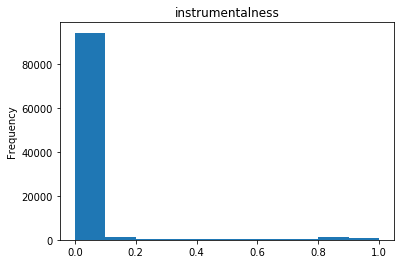

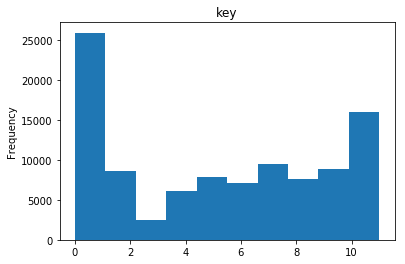

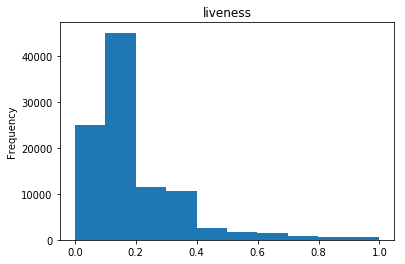

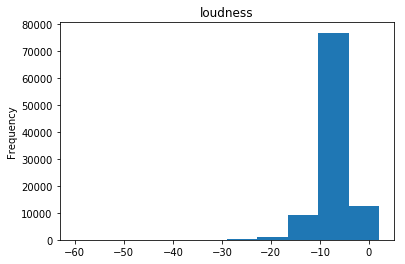

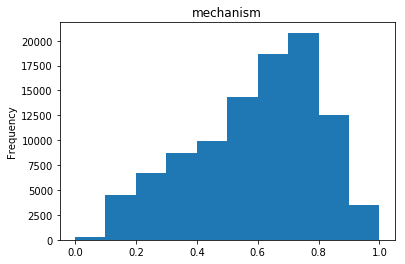

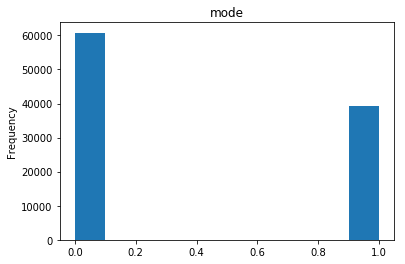

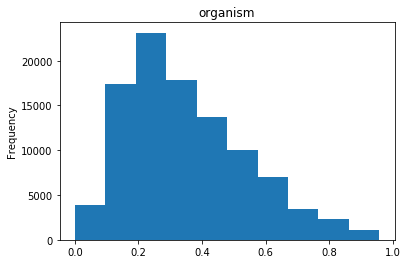

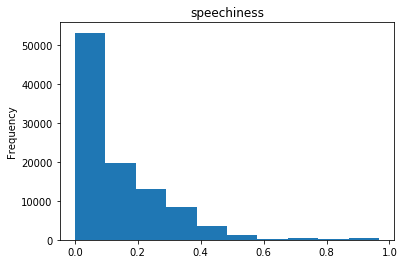

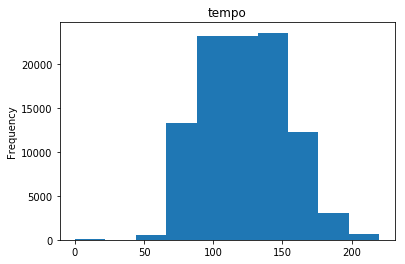

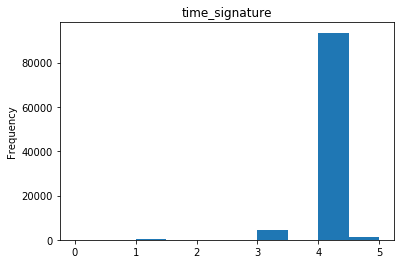

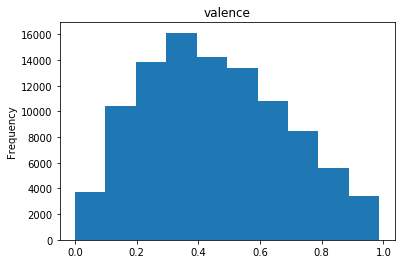

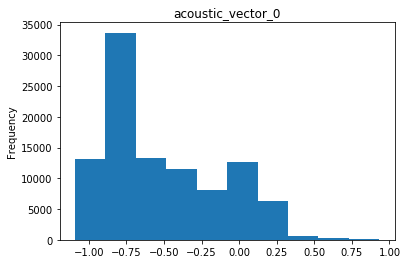

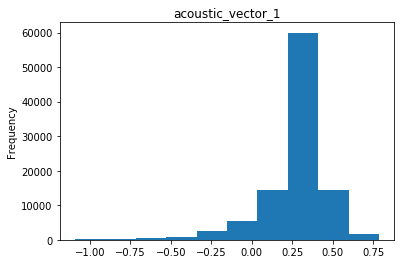

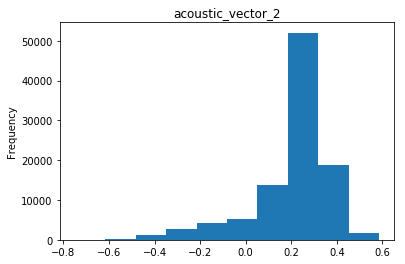

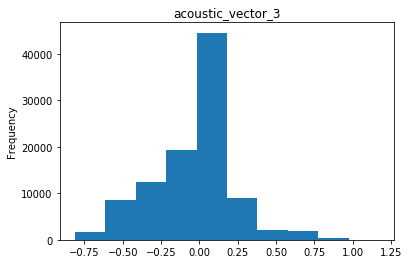

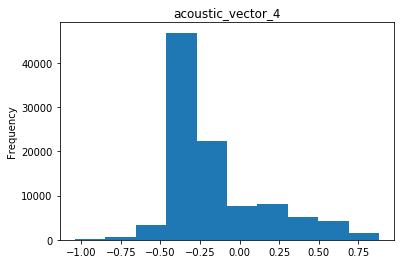

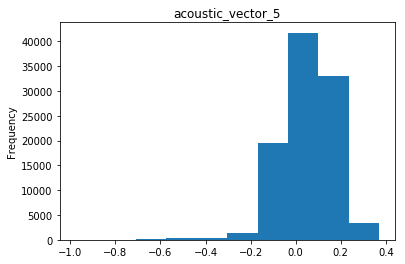

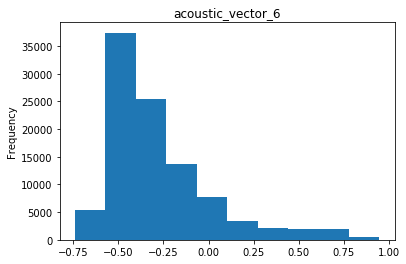

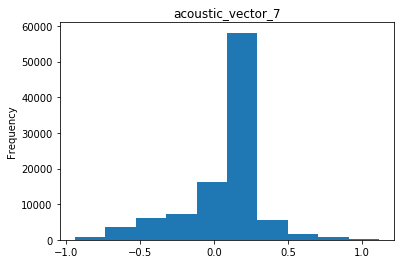

In [12]:
for c in df_trn.columns[2:]:
    df_trn[c].iloc[:100000].plot.hist()
    plt.yscale('linear')
    plt.title(c)
    plt.show()

# X / y split

In [13]:
df_trn.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'skip_4', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'mode',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='object')

User level (already in `last`):  `'hour_of_day', 'premium'`
 
 Median: `'duration', 'release_year', 'us_popularity_estimate', 
 'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end'`

In [14]:
X_trn, y_trn, X_trk = get_XY(df_trn.iloc[:], aggs, reset_index=False, 
                      list_musik_qualities_=list_musik_qualities,#list_musik_qualities,#['valence'], 
                      aggs_music_qualities_=aggs_music_qualities,
                             i_=0,
                            aggs_trkvec_=aggs_trkvec, list_trkvec_=list_trkvec)#['acoustic_vector_0', 'acoustic_vector_1'])
                       #i_=list(range(5)))
gc.collect()

569

In [15]:
# X_trk[0]['AGG_acoustic_vector_COS_SKIPDIFF'].plot.hist(bins=51)

In [16]:
psutil.Process(os.getpid()).memory_info().rss / 1024**2

2764.48046875

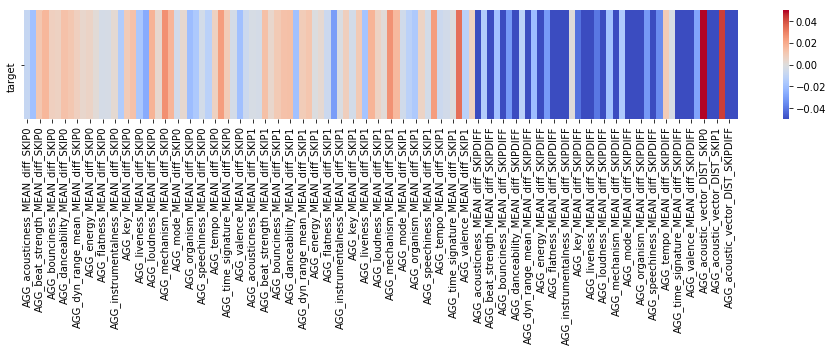

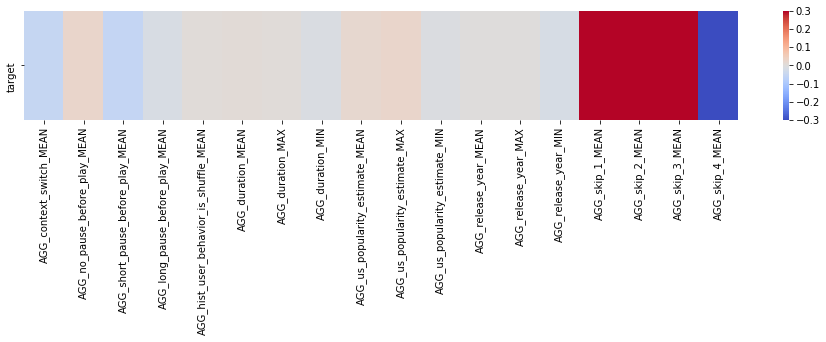

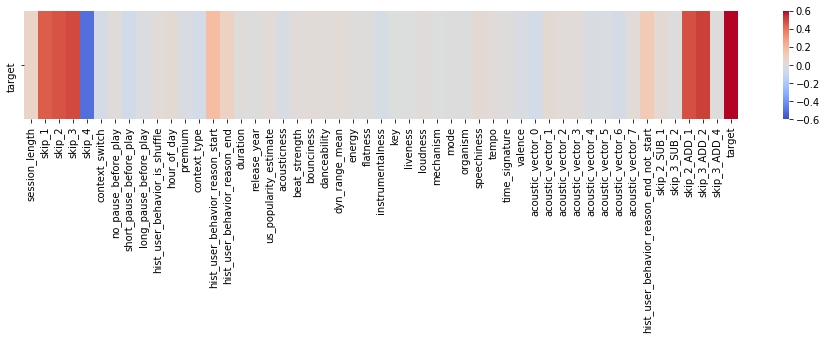

In [17]:
XY_corr = pd.concat([X_trn,X_trk[0],y_trn[0].rename('target')], axis=1).iloc[:10000].corr()
for cols, (vmin,vmax) in [
    ([c for c in XY_corr.columns if '_SKIP' in c],(-0.05, 0.05)),
    ([c for c in XY_corr.columns if '_SKIP' not in c and c.startswith('AGG_')],(-0.30,0.30)),
    ([c for c in XY_corr.columns if not c.startswith('AGG_')], (-0.6,0.6)),
]:
    _ = plt.figure(figsize=(16,2))
    _ = sns.heatmap(XY_corr[['target']].loc[cols,:].T, vmax=vmax, vmin=vmin, cmap='coolwarm')


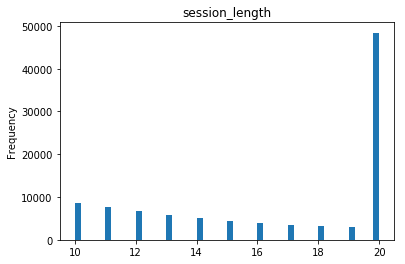

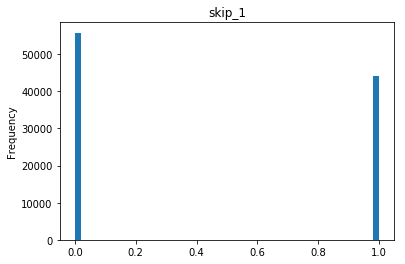

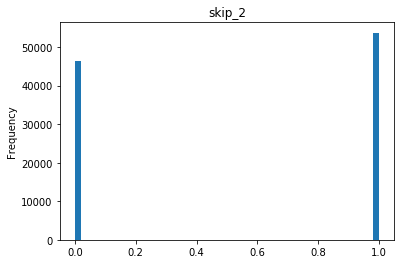

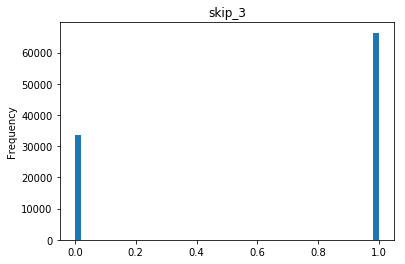

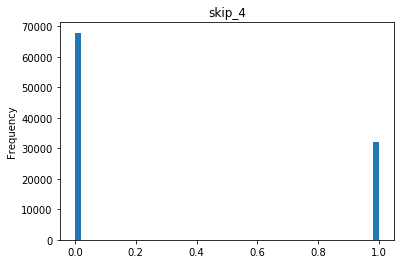

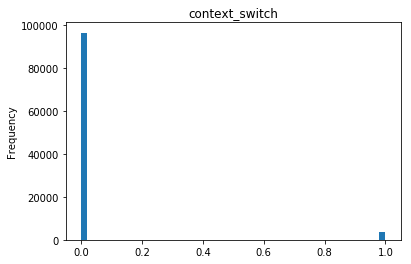

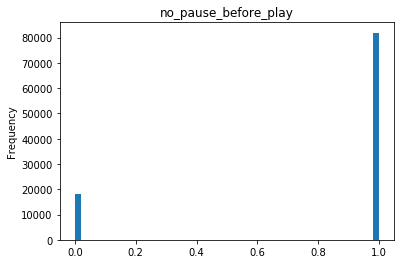

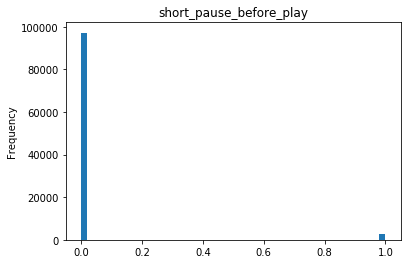

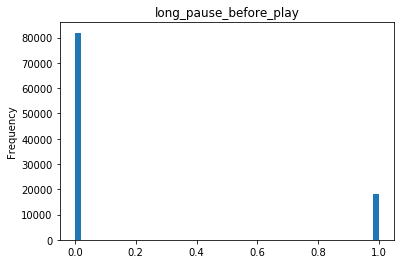

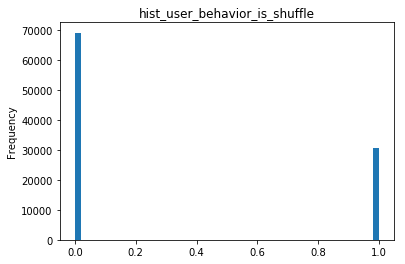

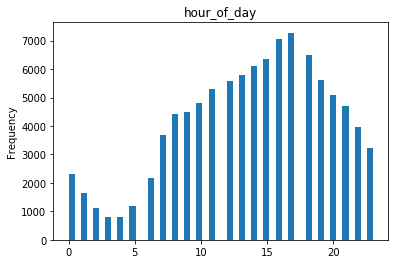

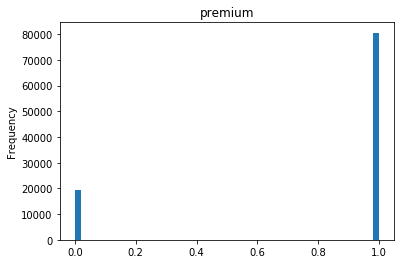

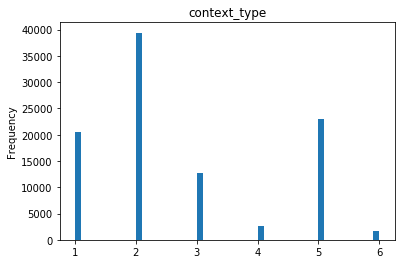

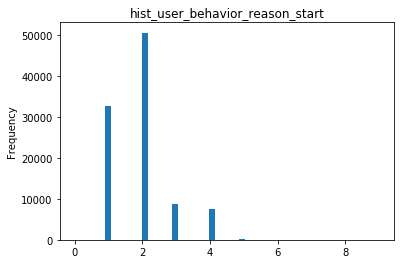

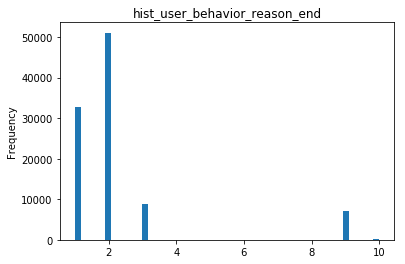

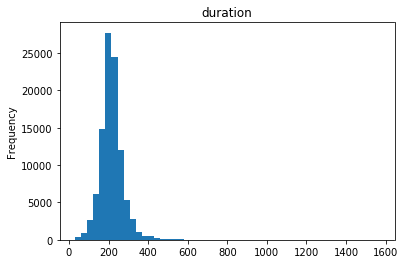

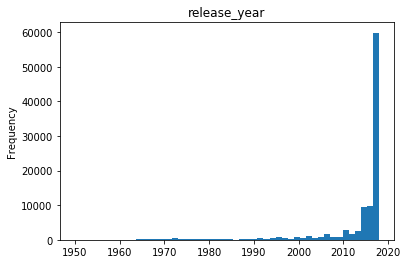

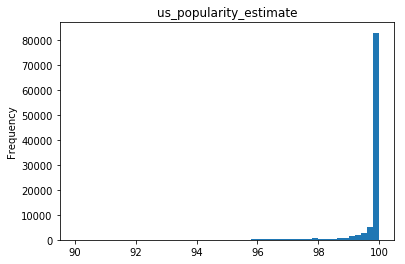

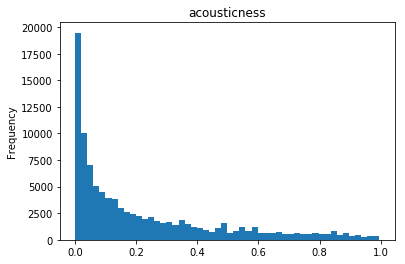

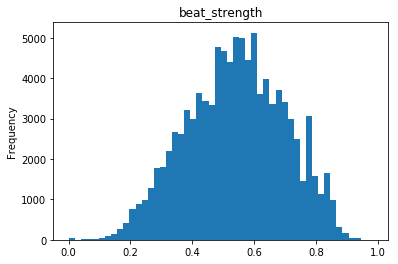

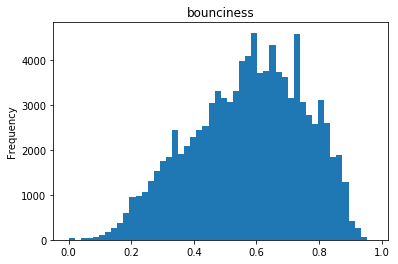

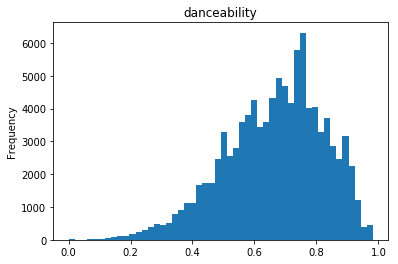

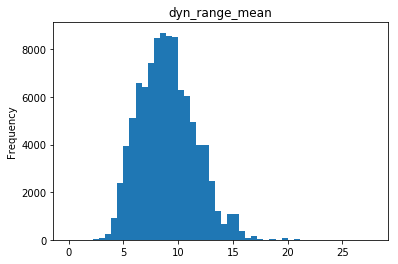

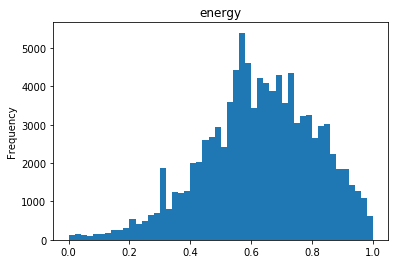

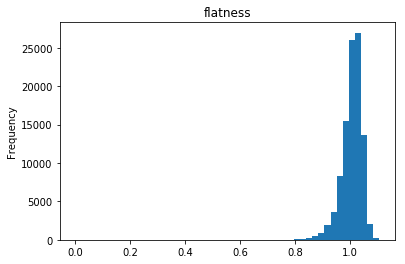

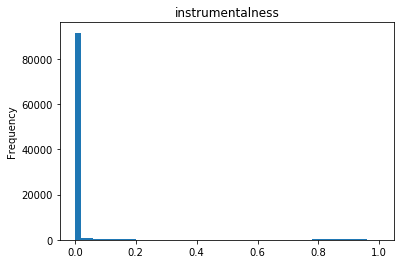

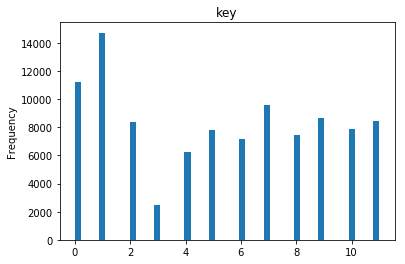

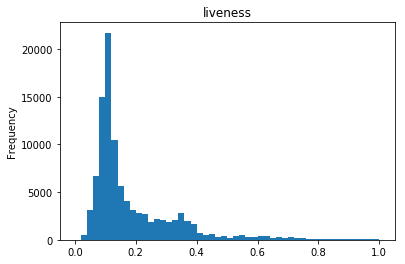

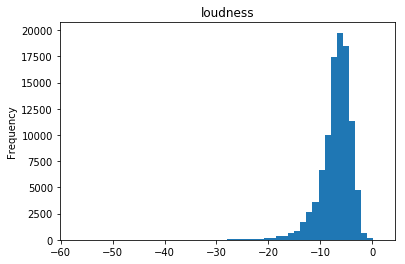

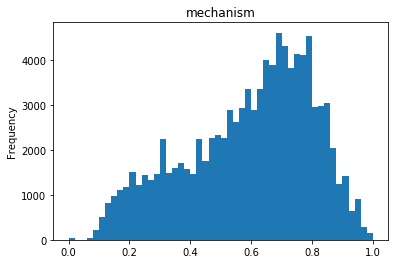

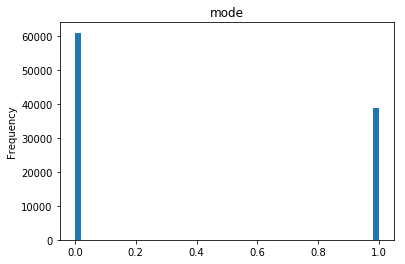

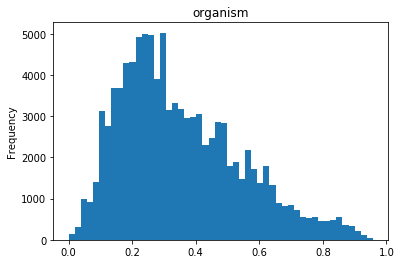

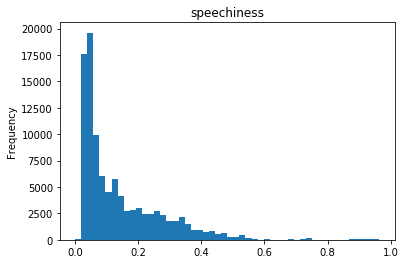

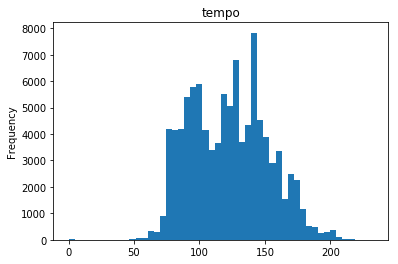

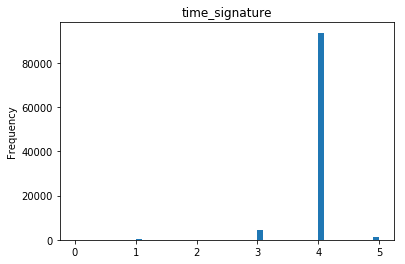

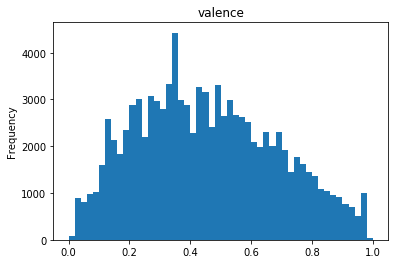

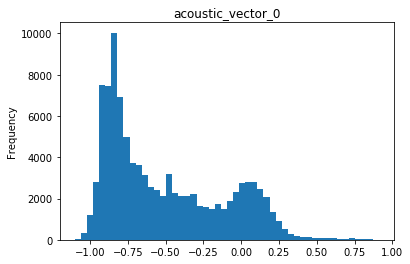

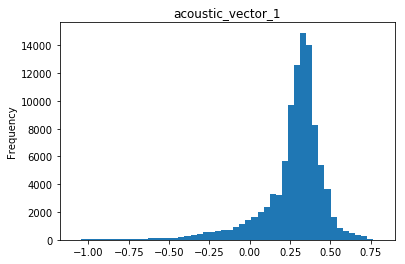

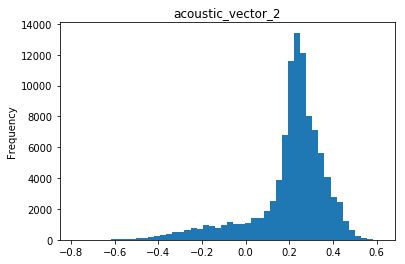

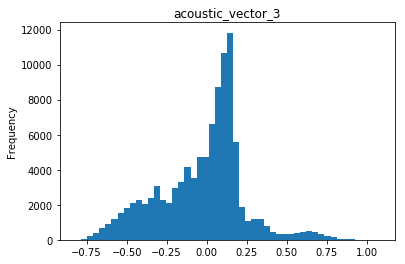

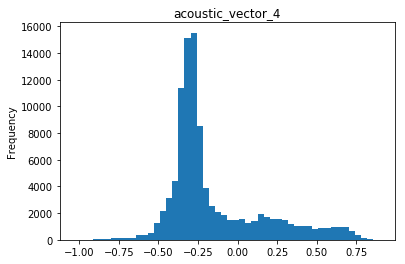

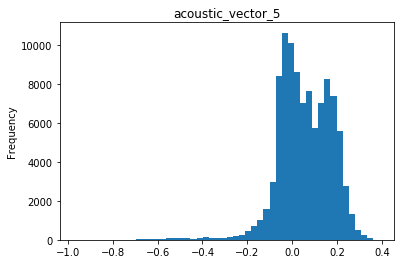

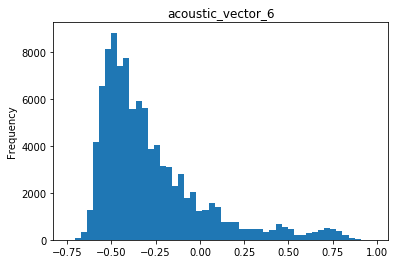

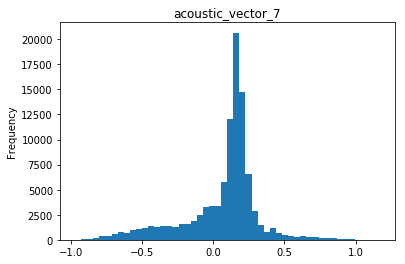

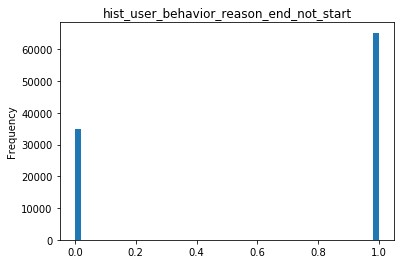

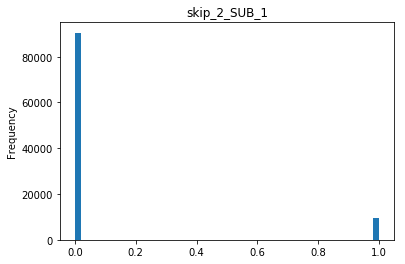

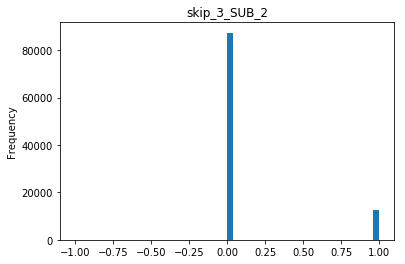

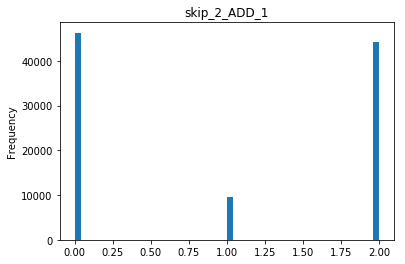

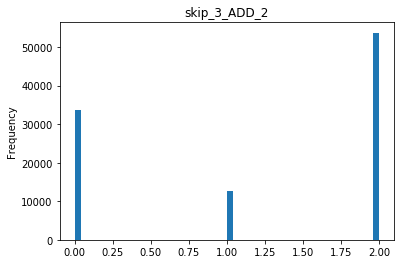

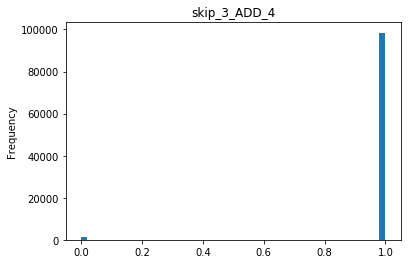

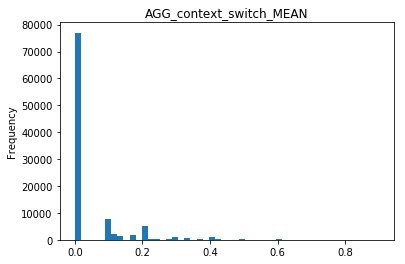

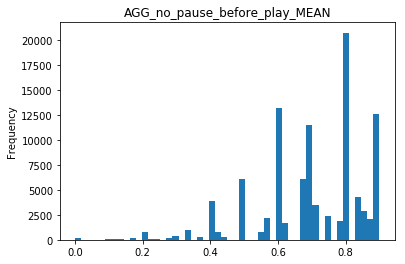

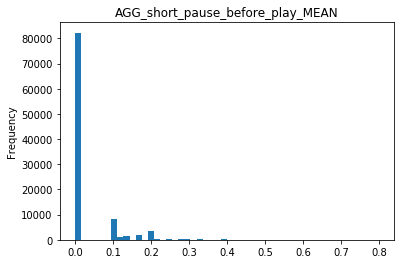

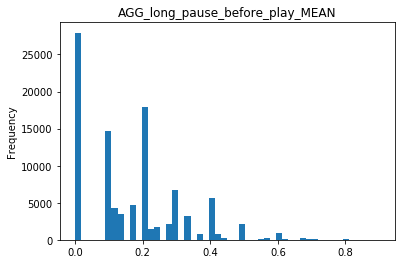

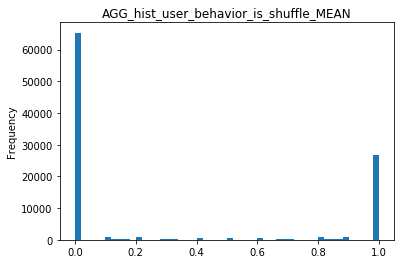

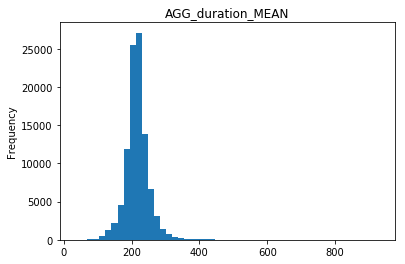

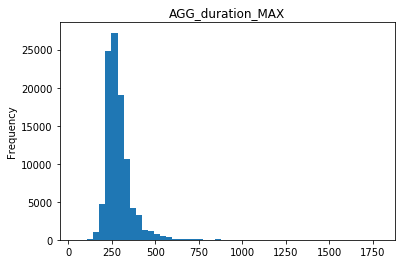

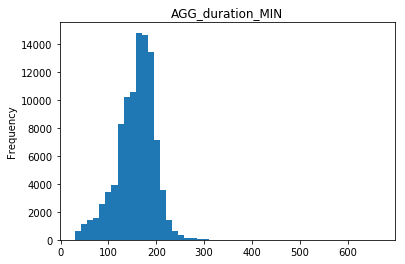

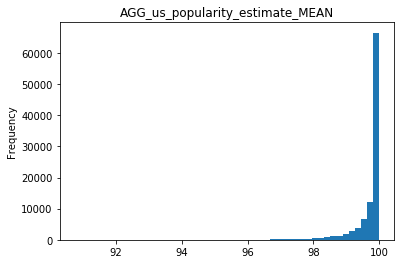

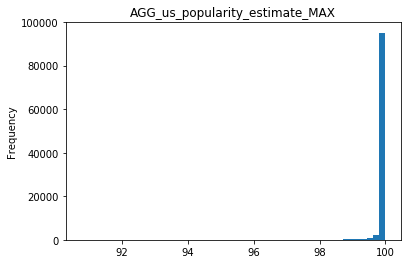

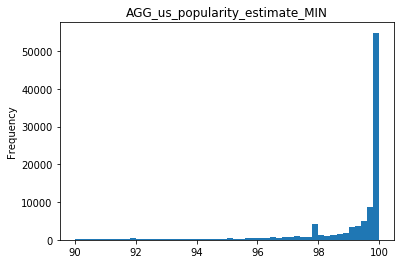

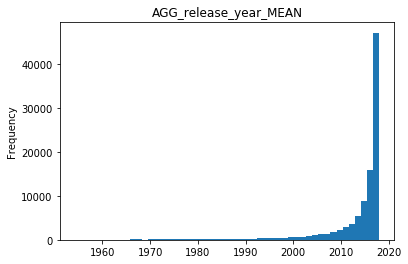

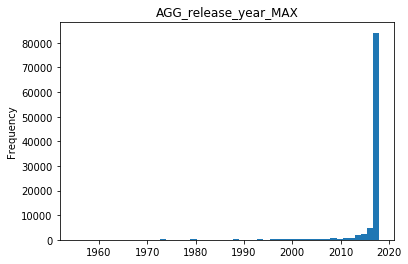

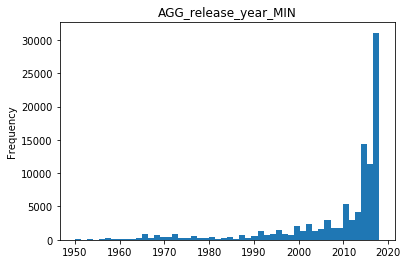

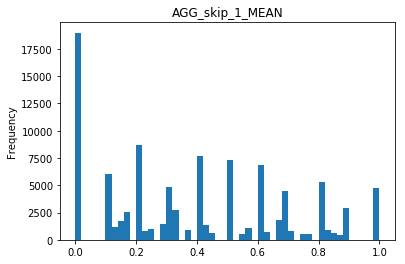

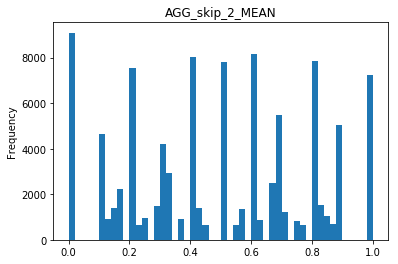

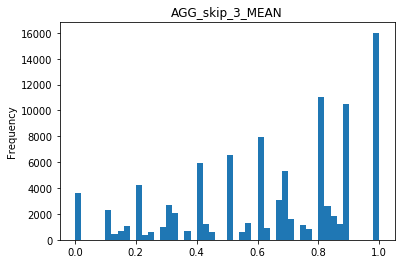

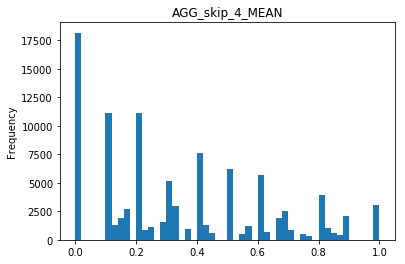

In [18]:
for c in X_trn.columns:
    X_trn[c].iloc[:100000].plot.hist(bins=50)
    plt.yscale('linear')
    plt.title(c)
    plt.show()

In [19]:
X_trn.head()

,session_length,skip_1,skip_2,skip_3,skip_4,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,hist_user_behavior_reason_end_not_start,skip_2_SUB_1,skip_3_SUB_2,skip_2_ADD_1,skip_3_ADD_2,skip_3_ADD_4,AGG_context_switch_MEAN,AGG_no_pause_before_play_MEAN,AGG_short_pause_before_play_MEAN,AGG_long_pause_before_play_MEAN,AGG_hist_user_behavior_is_shuffle_MEAN,AGG_duration_MEAN,AGG_duration_MAX,AGG_duration_MIN,AGG_us_popularity_estimate_MEAN,AGG_us_popularity_estimate_MAX,AGG_us_popularity_estimate_MIN,AGG_release_year_MEAN,AGG_release_year_MAX,AGG_release_year_MIN,AGG_skip_1_MEAN,AGG_skip_2_MEAN,AGG_skip_3_MEAN,AGG_skip_4_MEAN
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20,0,0,0,1,0,1,0,0,1,11,0,5,1,1,201.500,2018,99.7500,0.118530,0.412109,0.395020,0.636719,6.511719,0.836914,1.008789,0.000000e+00,0,0.167236,-2.742188,0.656250,0,0.257080,0.043304,107.9375,4,0.616699,-0.204718,0.460288,0.393730,-0.157205,-0.311094,0.202527,0.239795,-0.136178,1,0,0,0,0,1,0.0,0.800000,0.0,0.100000,1.0,201.125,222.250,192.6250,99.875,100.0000,99.7500,2018.000000,2018.0,2018.0,0.800000,0.800000,0.800000,0.200000
1,19,0,0,0,1,0,1,0,0,0,21,1,4,2,1,193.375,2018,99.4375,0.047852,0.479248,0.592285,0.539551,9.554688,0.768066,0.981445,5.960464e-08,1,0.106262,-6.832031,0.364502,0,0.450684,0.384033,171.2500,4,0.552246,-0.835863,0.250366,0.165875,0.179253,-0.320500,-0.058309,-0.464262,0.220718,0,0,0,0,0,1,0.0,0.555556,0.0,0.333333,0.0,176.875,223.125,128.1250,99.250,100.0000,94.5625,2018.000000,2018.0,2018.0,0.111111,0.111111,0.111111,0.666667
2,20,1,1,1,0,0,1,0,0,0,2,1,2,2,2,221.750,2016,100.0000,0.005852,0.354736,0.343262,0.543945,6.117188,0.780762,0.998535,0.000000e+00,6,0.190918,-6.160156,0.604004,1,0.280029,0.031113,144.1250,4,0.527344,-0.053835,0.359863,0.199584,-0.378137,0.128573,0.158851,-0.402050,-0.450350,1,0,0,2,2,1,0.0,0.800000,0.0,0.100000,0.0,211.875,222.500,193.2500,100.000,100.0000,99.9375,2016.300049,2018.0,2015.0,0.600000,0.700000,0.700000,0.300000
3,20,0,0,0,1,0,1,0,0,0,18,0,2,2,1,209.625,2012,99.6250,0.080322,0.405273,0.390137,0.619629,6.488281,0.694336,1.009766,0.000000e+00,3,0.401123,-4.777344,0.591309,0,0.294434,0.042542,122.0000,4,0.239868,-0.894035,0.325118,0.210516,0.114594,-0.340707,-0.042476,-0.530099,0.173256,0,0,0,0,0,1,0.0,0.900000,0.0,0.000000,0.0,212.750,294.500,123.5625,99.625,99.8125,99.2500,2012.000000,2012.0,2012.0,0.300000,0.500000,0.500000,0.500000
4,20,1,1,1,0,0,1,0,0,0,11,0,1,2,2,230.875,2010,100.0000,0.084778,0.584961,0.602051,0.758301,8.781250,0.685547,0.995605,1.271248e-03,11,0.141968,-6.347656,0.814453,0,0.144165,0.079224,130.0000,4,0.443604,-0.417094,0.398622,0.406360,-0.111943,-0.561103,0.233308,0.246151,0.332788,1,0,0,2,2,1,0.0,0.400000,0.4,0.500000,0.0,216.875,232.500,201.5000,100.000,100.0000,99.9375,2008.400024,2018.0,1992.0,0.600000,0.600000,0.600000,0.100000


In [20]:
# y_competition_truth = get_y_truth(df_trn)

In [21]:
# y_competition_truth = pd.Series(y_competition_truth)

In [22]:
y_competition_truth = pd.concat([pd.read_hdf(f, key='df') for f in ys[start_file:start_file+n_files]], axis=0)

In [23]:
X_trn.memory_usage(deep=True).sum()/1024**2

87.5776309967041

In [24]:
X_trk[0].memory_usage(deep=True).sum()/1024**2

195.54648971557617

# Train / early-stop split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
id_trn, id_stp, y_lists_trn, y_lists_stp = train_test_split(X_trn.index, y_competition_truth, test_size=0.10, random_state=314, shuffle=True)

# Train a baseline

In [27]:
import lightgbm as lgb
mdl = lgb.LGBMClassifier(max_depth=-1, min_child_samples=400, 
              random_state=314, silent=True, metric='None', 
              n_jobs=4, n_estimators=500, learning_rate=0.1,
              **{'colsample_bytree': 0.75, 'min_child_weight': 1, 
               'num_leaves': 60, 'subsample': 0.75}
             )

def learning_rate_decay_power_0995(current_iter):
    base_learning_rate = 0.15
    lr = base_learning_rate  * np.power(.998, current_iter)
    return lr if lr > 1e-2 else 1e-2

In [28]:
n_fit = None

In [29]:
X = pd.concat([X_trn, X_trk[0]], axis=1)
fit_params = {'eval_names': ['train', 'early_stop'],
              'eval_set': [(X.loc[id_trn,:], y_trn[0].loc[id_trn]), 
                           (X.loc[id_stp,:], y_trn[0].loc[id_stp])],
              'eval_metric': 'binary_error',
              'verbose':50, 'early_stopping_rounds':60,
              'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

mdl.fit(X.loc[id_trn,:].iloc[:n_fit], y_trn[0].loc[id_trn].iloc[:n_fit], **fit_params)

prob_pred = mdl.predict_proba(X.loc[id_stp,:])[:,1]
evaluate_model(prob_pred>0.55, y_lists_stp)

In [30]:
# kg.display_importances(pd.DataFrame({'feature': X.columns,
#                                   'importance': mdl.booster_.feature_importance('gain')}),
#                     n_feat=20,
#                     title='GAIN feature importance',
#                     fout_name='feature_importance_gain.png',   
#                     dump_strs=[])

# Make models for each song iteration

----------- 0 -------------
Full dataframe length = 6781153
Training until validation scores don't improve for 60 rounds.
[100]	train's binary_error: 0.210688	early_stop's binary_error: 0.221535
Early stopping, best iteration is:
[44]	train's binary_error: 0.216524	early_stop's binary_error: 0.220945
Constant prediction based on model trained on 0th event: AA=0.5551, FPA=0.7791
The list of features with 0 importance: 
['long_pause_before_play', 'mode', 'skip_3', 'skip_3_ADD_4', 'time_signature']
3315.8125
----------- 1 -------------
Full dataframe length = 6781153
Training until validation scores don't improve for 60 rounds.
[100]	train's binary_error: 0.281244	early_stop's binary_error: 0.29849
Early stopping, best iteration is:
[137]	train's binary_error: 0.275861	early_stop's binary_error: 0.298293
Constant prediction based on model trained on 1th event: AA=0.5607, FPA=0.7672
The list of features with 0 importance: 
['long_pause_before_play', 'short_pause_before_play', 'skip_3_ADD_4

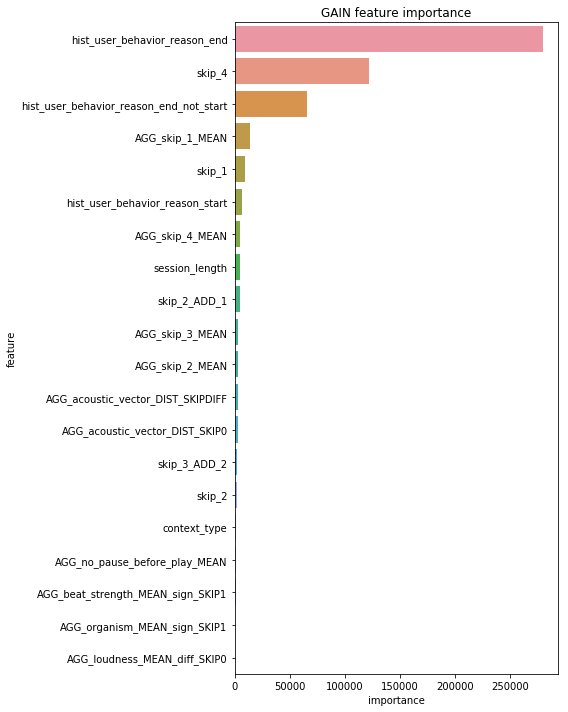

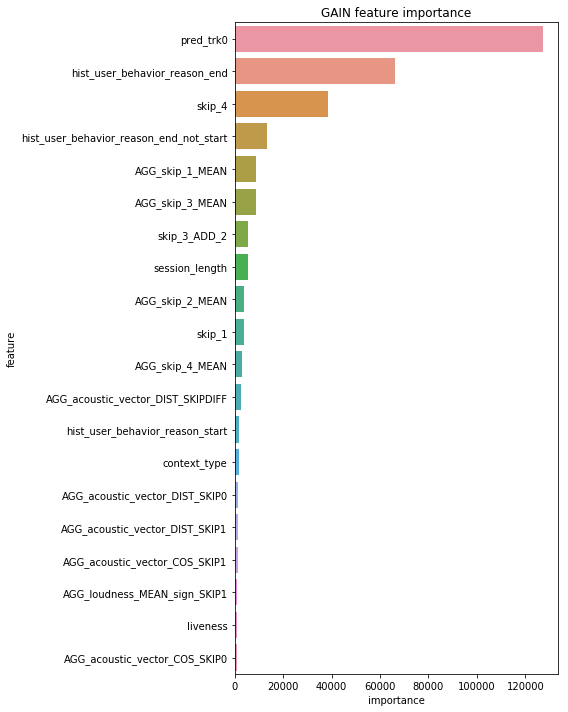

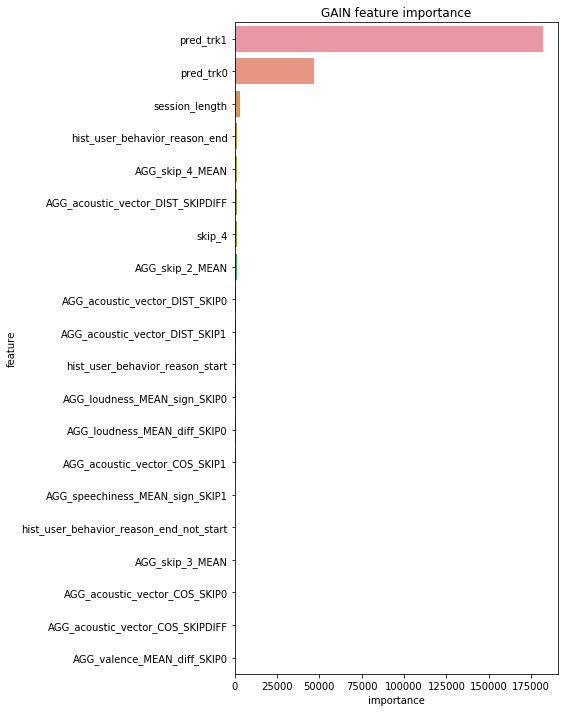

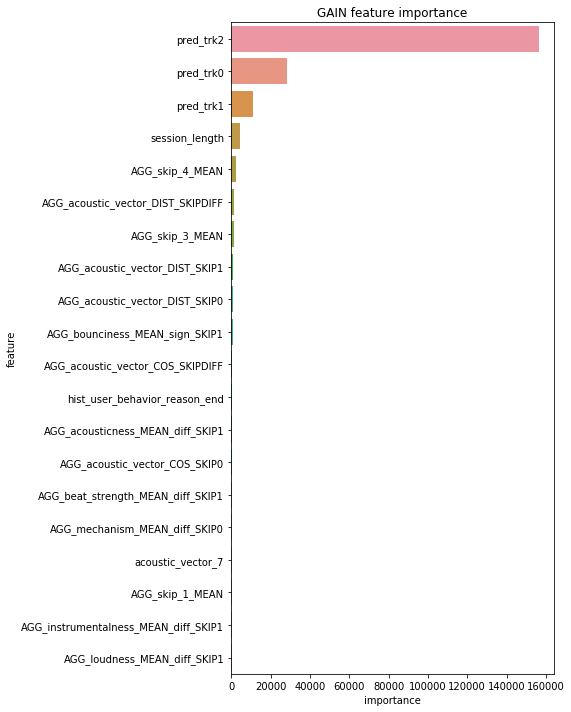

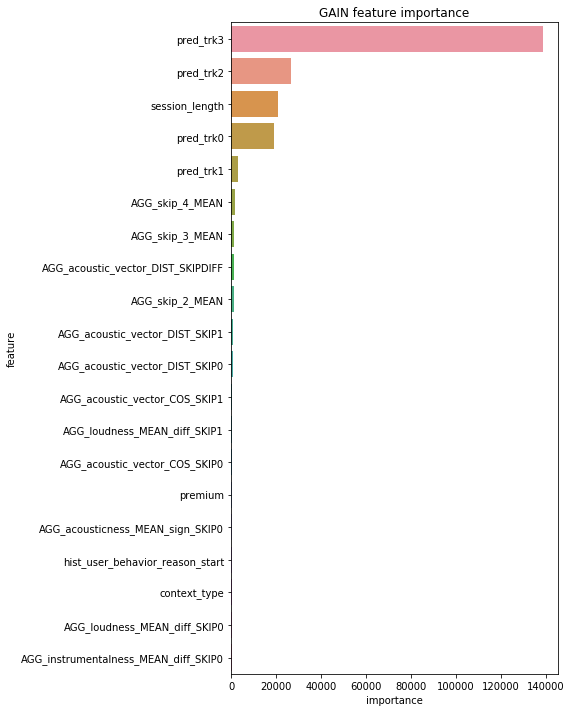

In [31]:
# fit_params = {'eval_names': ['train', 'early_stop'],
#               'eval_metric': 'binary_error',
#               'verbose':10, 'early_stopping_rounds':60,
#               'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

l_prob = []
X_prob=[]

for i_ in list(range(5)):
    print('----------- {} -------------'.format(i_))
    print('Full dataframe length = {}'.format(len(df_trn)))
    X_trn, y_trn, X_trk = get_XY(df_trn.iloc[:], aggs, reset_index=False, 
                      list_musik_qualities_=list_musik_qualities,#['valence'], 
                      aggs_music_qualities_=aggs_music_qualities,
                             i_=i_,
                                 aggs_trkvec_=aggs_trkvec, list_trkvec_=list_trkvec)
    
    # for X_trk being produced centrally
    # i_trk = i_
    # for X_trk produced here in the loop
    i_trk = 0

    # merge track aggregates
    X = pd.concat([X_trn, X_trk[i_trk]], axis=1)
    # add predictions for the last modelled track
    if len(X_prob) > 0:
        X = pd.concat([X, pd.DataFrame({'pred_trk{}'.format(j): X_prob[j] 
                                        for j in range(len(X_prob))
                                       })],
                      axis=1)
    # get training and early-stop data and targets
    X_trn_, y_trn_ = X.loc[id_trn,:], y_trn[i_trk].loc[id_trn]
    X_stp_, y_stp_ = X.loc[id_stp,:], y_trn[i_trk].loc[id_stp]
    
    # limit yourself to long-enough sessions
    if i_ >= 5:
        orig_len = len(X_trn_)
        is_long_session = X_trn_['session_length'] >= (2*i_+1)
        X_trn_, y_trn_ = (X_trn_[is_long_session],
                          y_trn_[is_long_session])
        is_long_session = X_stp_['session_length'] >= (2*i_+1)
        X_stp_, y_stp_ = (X_stp_[is_long_session],
                          y_stp_[is_long_session])
        y_lists_stp_ = y_lists_stp[is_long_session.values]

        final_len = len(X_trn_)
        print('Kept {:.2f}% of data'.format(100. * final_len / orig_len))
    else:
        y_lists_stp_ = y_lists_stp
        
#     display(y_trn_.head(30))
    
    fit_params = {'eval_names': ['train', 'early_stop'],
                  'eval_set': [(X_trn_, y_trn_), 
                               (X_stp_, y_stp_)],
                  'eval_metric': 'binary_error',
                  'verbose':100, 'early_stopping_rounds':60,
                  'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}    
    
    mdl.fit(X_trn_, y_trn_, 
            **fit_params)

    #prediction for the validation/easly_stopping sample
    prob_pred = mdl.predict_proba(X_stp_)[:,1]
    
    del X_trn_, y_trn_, X_stp_, y_stp_
    gc.collect()
    
    # save full (trn+val) prediction to be used in modelling
    X_prob.append(mdl.predict_proba(X)[:,1])

    perf = evaluate_model(prob_pred>0.50, y_lists_stp_)
    print('Constant prediction based on model trained on {}th event: AA={:.4f}, FPA={:.4f}'
          .format(i_, perf[0], perf[1])
         )
    
#     n_2print = 20
#     print(pd.DataFrame({'feature': X.columns,
#                   'importance': mdl.booster_.feature_importance('gain')}
#                 ).sort_values(
#         by="importance", ascending=False)[-n_2print:]
#          )
    
    kg.display_importances(pd.DataFrame({'feature': X.columns,
                                  'importance': mdl.booster_.feature_importance('gain')}),
                    n_feat=20,
                    title='GAIN feature importance',
                    fout_name='feature_importance_gain_{}.png'.format(i_),   
                    dump_strs=[])
    
    # store the model
    import joblib
    joblib.dump(mdl, 'models/model_v2_m05i1_{}f_{}.pkl'.format(n_files, i_))
    
    prob_pred = mdl.predict_proba(X.loc[id_stp,:])[:,1]
    l_prob.append(prob_pred)
    del X
    gc.collect()
    print(psutil.Process(os.getpid()).memory_info().rss / 1024**2)

In [32]:
y_lists_stp.shape

(40725,)

## Competition metric on validation sample for different filling schemes

In [33]:
for i in range(len(l_prob)):
    perf = evaluate_set_of_models([l_prob[i_]>0.50 for i_ in range(i+1)], y_lists_stp, i_2fill=-2)
    print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
          .format(perf[0], perf[1], i))

AA=0.5551, FPA=0.7791: non-modeled based on 0
AA=0.5622, FPA=0.7791: non-modeled based on 1
AA=0.5635, FPA=0.7791: non-modeled based on 2
AA=0.5663, FPA=0.7791: non-modeled based on 3
AA=0.5687, FPA=0.7791: non-modeled based on 4


In [34]:
# preds_lists_full = pred_series_of_lists([p>0.50 for p in X_prob], y_competition_truth.apply(len), i_2fill=-2)

In [35]:
# preds_lists_full.head(20)

## Competition metric on the full (trn+val) sample for different number of predictions

In [36]:
# for i in range(len(X_prob)):
#     perf = evaluate_set_of_models([X_prob[i_]>0.50 for i_ in range(i+1)], y_competition_truth, i_2fill=-2)
#     print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
#           .format(perf[0], perf[1], i))

# Make single model to predict for all songs

In [37]:
# X_trn, y_trn = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
#                       list_musik_qualities_=list_musik_qualities,#['valence'], 
#                       aggs_music_qualities_=aggs_music_qualities,
#                        i_=0)
# X_trn, X_stp, y_trn, y_stp = train_test_split(X_trn, y_trn, test_size=0.10, random_state=314, shuffle=True)

# fit_params['eval_set'] = [(X_trn,y_trn), (X_stp,y_stp)]
# mdl.fit(X_trn.iloc[:n_fit], y_trn.iloc[:n_fit], **fit_params)

# l_prob_2 = []

# for i in range(5):
#     X_trn, y_trn = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
#                       list_musik_qualities_=list_musik_qualities,#['valence'], 
#                       aggs_music_qualities_=aggs_music_qualities,
#                        i_=i)
#     X_trn, X_stp, y_trn, y_stp = train_test_split(X_trn, y_trn, test_size=0.10, random_state=314, shuffle=True)

#     prob_pred = mdl.predict_proba(X_stp)[:,1]
#     perf = evaluate_model(prob_pred>0.55, y_lists_stp)
#     print('Competition metric with a constant prediction\
#             based on model trained on {}th event: AA={:.4f}, FPA={:.4f}'
#           .format(i, perf[0], perf[1])
#          )
#     l_prob_2.append(prob_pred)

In [38]:
# for i in range(len(l_prob_2)):
#     perf = evaluate_set_of_models([p>0.50 for p in l_prob_2], y_lists_stp, i_2fill=i)
#     print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
#           .format(perf[0], perf[1], i))